In [3]:
## Importation des librairies de python 

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from PIL import Image
import warnings
from PIL import Image
import zipfile
import tensorflow_hub as hub
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')
np.random.seed(0)
tf.random.set_seed(0)

# Chargement des données
- Les données consistent en plus de 50000 images de panneaux de signalisation appartenant à 43 classes différentes.
- Le dossier `Meta` contient une image de chaque classe.
- Le dossier `Train` contient plus de 39000 images pour l'entraînement et le dossier `Test` contient environ 12000 images.
- Les fichiers csv contiennent la dimension de l'image, son chemin et le label correspondant.

Vous pouvez trouvez les données dans le site du projet GTSRB ou sur kaggle. 
 ([website](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset), [kaggle](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign))

 # **Cependant le plus simple est de recupérer les données depuis ce lien de Drive que j'ai crée car j'ai déjà converti les images du format d'origne .ppm en .jpeg [Drive datasets by PSW](https://drive.google.com/drive/folders/1t43GSfoWpR68SG8SNgP0A-52kacCS8AI)**

In [4]:
# ## importation de fichiers CSV depuis votre ordinateur en local  
from google.colab import files 
files.upload()

Saving Meta.csv to Meta (1).csv
Saving Test.csv to Test (1).csv
Saving Train.csv to Train (1).csv


{'Meta.csv': b'Path,ClassId,ShapeId,ColorId,SignId\nMeta/27.png,27,0,0,1.32\nMeta/0.png,0,1,0,3.29\nMeta/1.png,1,1,0,3.29\nMeta/10.png,10,1,0,3.27\nMeta/11.png,11,0,0,1.22\nMeta/12.png,12,2,2,2.3\nMeta/13.png,13,4,0,2.1\nMeta/14.png,14,3,0,2.2\nMeta/15.png,15,1,0,3.1\nMeta/16.png,16,1,0,3.3\nMeta/17.png,17,1,0,3.21\nMeta/18.png,18,0,0,1.39\nMeta/19.png,19,0,0,1.2\nMeta/2.png,2,1,0,3.29\nMeta/20.png,20,0,0,1.1\nMeta/21.png,21,0,0,1.3.2\nMeta/22.png,22,0,0,1.1\nMeta/23.png,23,0,0,1.13\nMeta/24.png,24,0,0,1.5.2\nMeta/25.png,25,0,0,1.37\nMeta/26.png,26,0,0,1.24\nMeta/28.png,28,0,0,1.33\nMeta/29.png,29,0,0,1.34\nMeta/3.png,3,1,0,3.29\nMeta/30.png,30,0,0,None\nMeta/31.png,31,0,0,1.36\nMeta/32.png,32,1,3,3.42\nMeta/33.png,33,1,1,4.2\nMeta/34.png,34,1,1,4.3\nMeta/35.png,35,1,1,4.1\nMeta/36.png,36,1,1,4.4\nMeta/37.png,37,1,1,4.5\nMeta/38.png,38,1,1,4.7\nMeta/39.png,39,1,1,4.8\nMeta/4.png,4,1,0,3.29\nMeta/40.png,40,1,1,4.1\nMeta/41.png,41,1,3,3.26\nMeta/42.png,42,1,3,3.28\nMeta/5.png,5,1,0,3.29\

In [5]:
# depuis google drive c'est beaucoup plus rapide 
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#path = '/content/drive/My Drive/'

In [6]:
path = "/content/drive/MyDrive/DEEP LEARNING/DEEP_LEARNING/" #chemin ou situe mes datas

In [7]:
%%time
import zipfile
with zipfile.ZipFile(path + "Meta.zip","r") as zip_ref:
        zip_ref.extractall("")
        
with zipfile.ZipFile(path + "Train.zip","r") as zip_ref:
        zip_ref.extractall("")

with zipfile.ZipFile(path + "Test.zip","r") as zip_ref:
        zip_ref.extractall("")

CPU times: user 6.45 s, sys: 3.67 s, total: 10.1 s
Wall time: 10.8 s


# **Preparation des données training validation et labels**

In [8]:
path_files = "/content/"

In [9]:
meta = os.listdir(path_files +'Meta')
#meta

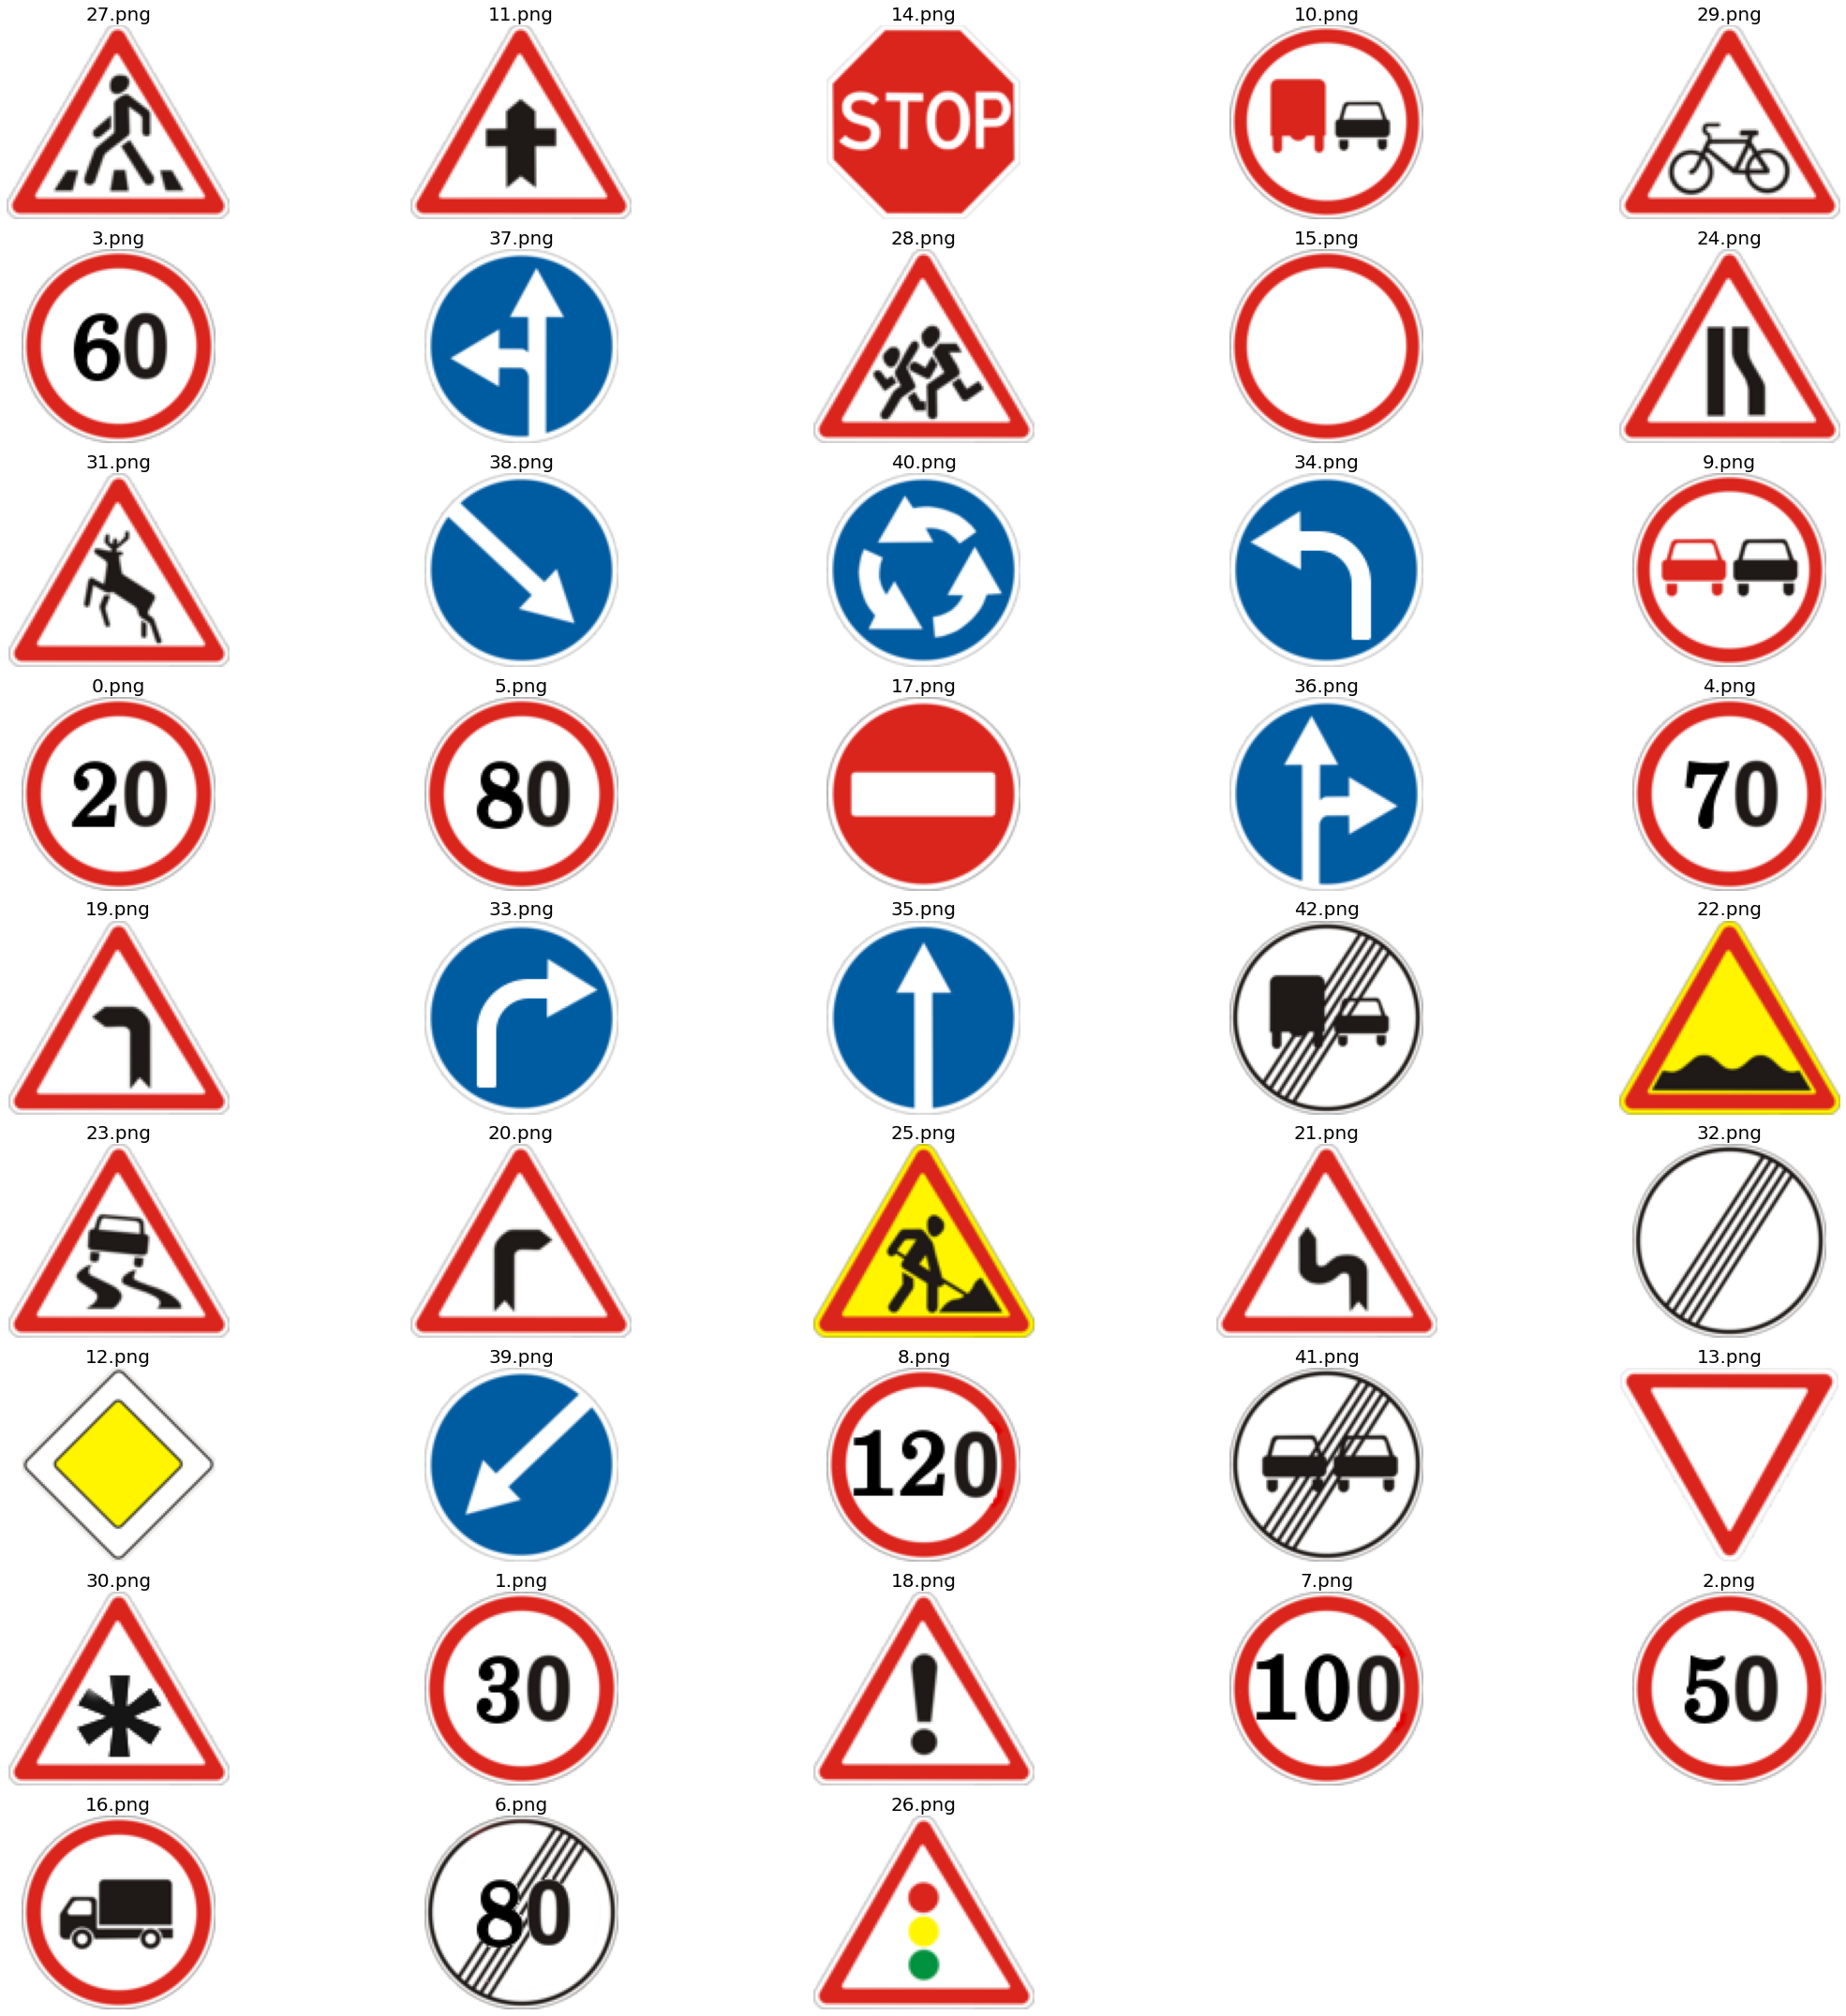

In [ ]:
## Viewing images belonging to each class

plt.figure(figsize=(30,30))
for i, file in enumerate(meta):
    img = Image.open(path_files+'Meta/'+file)
    ax = plt.subplot(9,5,i+1)
    ax.imshow(img)
    ax.set_title(file, size=20)
    plt.axis('off')
plt.tight_layout()

In [10]:
## Creating a dictionary for class labels

classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [ ]:
%pwd

'/content'

In [11]:
train_df = pd.read_csv(path + "Train.csv")
train_df.head()

Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
0     27      26       5       5      22      20       20   
1     28      27       5       6      23      22       20   
2     29      26       6       5      24      21       20   
3     28      27       5       6      23      22       20   
4     28      26       5       5      23      21       20   

                             Path  
0  Train/20/00020_00000_00000.png  
1  Train/20/00020_00000_00001.png  
2  Train/20/00020_00000_00002.png  
3  Train/20/00020_00000_00003.png  
4  Train/20/00020_00000_00004.png

In [ ]:
train_df.describe()

Width        Height        Roi.X1        Roi.Y1        Roi.X2  \
count  39209.000000  39209.000000  39209.000000  39209.000000  39209.000000   
mean      50.835880     50.328930      5.999515      5.962381     45.197302   
std       24.306933     23.115423      1.475493      1.385440     23.060157   
min       25.000000     25.000000      0.000000      5.000000     20.000000   
25%       35.000000     35.000000      5.000000      5.000000     29.000000   
50%       43.000000     43.000000      6.000000      6.000000     38.000000   
75%       58.000000     58.000000      6.000000      6.000000     53.000000   
max      243.000000    225.000000     20.000000     20.000000    223.000000   

             Roi.Y2       ClassId  
count  39209.000000  39209.000000  
mean      44.728379     15.788390  
std       21.971145     12.013238  
min       20.000000      0.000000  
25%       30.000000      5.000000  
50%       38.000000     12.000000  
75%       52.000000     25.000000  
max      205.000000     42.000000

# Prétraitement
- Les dimensions moyennes de toutes les images sont d'environ 50x50 pixels.
- Toutes les images sont redimensionnées à (50,50) pixels et sauvegardées comme tableau numpy.
- Les données sont normalisées et les étiquettes sont encodées en One Hot.

In [10]:
print(f'minimum width: {train_df.Width.min()}')
print(f'minimum height: {train_df.Height.min()}')
print(f'average width: {train_df.Width.mean()}')
print(f'average height: {train_df.Height.mean()}')

minimum width: 25
minimum height: 25
average width: 50.83587951745773
average height: 50.328929582493814


In [12]:
train_x =[]
for i in train_df.Path:
    img = Image.open(path_files+i)       # reading image
    img = img.resize((28,28))     # reasizing image
    train_x.append(np.array(img)) # saving image as array to train

train_y = np.array(train_df.ClassId)
train_x = np.array(train_x)
print(train_x.shape)
print(train_y.shape)

(39209, 28, 28, 3)
(39209,)


In [13]:
test_df = pd.read_csv(path +'Test.csv')
test_df.head()

Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId            Path
0     53      54       6       5      48      49       16  Test/00000.png
1     42      45       5       5      36      40        1  Test/00001.png
2     48      52       6       6      43      47       38  Test/00002.png
3     27      29       5       5      22      24       33  Test/00003.png
4     60      57       5       5      55      52       11  Test/00004.png

In [14]:
test_x =[]
for i in test_df.Path:
    img = Image.open(path_files+i)
    img = img.resize((28,28))
    test_x.append(np.array(img))

test_y = np.array(test_df.ClassId)
test_x = np.array(test_x)
print(test_x.shape)
print(test_y.shape)

(12630, 28, 28, 3)
(12630,)


Dangerous curve right


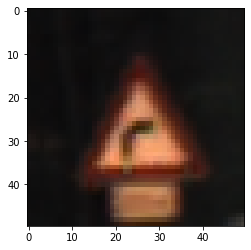

In [ ]:
print(classes[train_y[35]])
plt.imshow(train_x[35])
#plt.axis('off')
plt.show()

In [15]:
## Normalization

xtrain = train_x/255
xtest = test_x/255


# One Hot encoding

ytrain = keras.utils.to_categorical(train_y)
ytest = keras.utils.to_categorical(test_y)

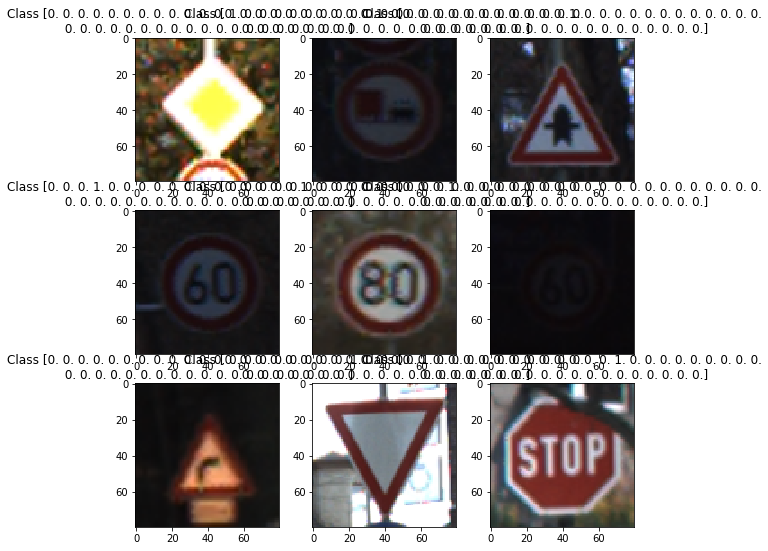

In [ ]:


import random
plt.rcParams['figure.figsize'] = (9,9) # aggradissement de la figure 

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(xtrain))
    plt.imshow(xtrain[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(ytrain[num]))
    
plt.tight_layout()

# Création d'un modèle CNN
- Les données sont divisées en données de formation et de validation
- Le modèle CNN contient deux blocs, chacun contenant deux couches convolutionnelles connectées à une couche de mise en commun Max.
- Celle-ci est ensuite connectée à un CNN entièrement connecté avec des couches de dropout entre les deux.
- Le modèle est compilé avec un optimiseur SGD et une fonction de perte sous forme d'entropie croisée catégorique.


In [16]:
## Splitting into train and validation data

from sklearn.model_selection import train_test_split
xtrain, xvalid, ytrain, yvalid = train_test_split(xtrain, ytrain, test_size=0.2, random_state=0)
print(xtrain.shape)
print(xvalid.shape)
print(ytrain.shape)
print(yvalid.shape)

(31367, 28, 28, 3)
(7842, 28, 28, 3)
(31367, 43)
(7842, 43)


In [26]:
BATCH_SIZE = 30
steps_per_epoch = 31367//BATCH_SIZE  # len(xtrain)

In [27]:
#@title visualization utilities [RUN ME]

"""
This cell contains helper functions used for visualization
and downloads only. You can skip reading it. There is very
little useful Keras/Tensorflow code here.
"""
import os, re, math, json, shutil, pprint
import PIL.Image, PIL.ImageFont, PIL.ImageDraw
import IPython.display as display
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
print("Tensorflow version " + tf.__version__)

# Matplotlib config
plt.ioff()
plt.rc('image', cmap='gray_r')
plt.rc('grid', linewidth=1)
plt.rc('xtick', top=False, bottom=False, labelsize='large')
plt.rc('ytick', left=False, right=False, labelsize='large')
plt.rc('axes', facecolor='F8F8F8', titlesize="large", edgecolor='white')
plt.rc('text', color='a8151a')
plt.rc('figure', facecolor='F0F0F0', figsize=(16,9))
# Matplotlib fonts
MATPLOTLIB_FONT_DIR = os.path.join(os.path.dirname(plt.__file__), "mpl-data/fonts/ttf")

# pull a batch from the datasets. This code is not very nice, it gets much better in eager mode (TODO)
def dataset_to_numpy_util(training_dataset, validation_dataset, N):
  
  # get one batch from each: 10000 validation digits, N training digits
  batch_train_ds = training_dataset.unbatch().batch(N)
  
  # eager execution: loop through datasets normally
  if tf.executing_eagerly():
    for validation_digits, validation_labels in validation_dataset:
      validation_digits = validation_digits.numpy()
      validation_labels = validation_labels.numpy()
      break
    for training_digits, training_labels in batch_train_ds:
      training_digits = training_digits.numpy()
      training_labels = training_labels.numpy()
      break
    
  else:
    v_images, v_labels = validation_dataset.make_one_shot_iterator().get_next()
    t_images, t_labels = batch_train_ds.make_one_shot_iterator().get_next()
    # Run once, get one batch. Session.run returns numpy results
    with tf.Session() as ses:
      (validation_digits, validation_labels,
       training_digits, training_labels) = ses.run([v_images, v_labels, t_images, t_labels])
  
  # these were one-hot encoded in the dataset
  validation_labels = np.argmax(validation_labels, axis=1)
  training_labels = np.argmax(training_labels, axis=1)
  
  return (training_digits, training_labels,
          validation_digits, validation_labels)

# create digits from local fonts for testing
def create_digits_from_local_fonts(n):
  font_labels = []
  img = PIL.Image.new('LA', (28*n, 28), color = (0,255)) # format 'LA': black in channel 0, alpha in channel 1
  font1 = PIL.ImageFont.truetype(os.path.join(MATPLOTLIB_FONT_DIR, 'DejaVuSansMono-Oblique.ttf'), 25)
  font2 = PIL.ImageFont.truetype(os.path.join(MATPLOTLIB_FONT_DIR, 'STIXGeneral.ttf'), 25)
  d = PIL.ImageDraw.Draw(img)
  for i in range(n):
    font_labels.append(i%10)
    d.text((7+i*28,0 if i<10 else -4), str(i%10), fill=(255,255), font=font1 if i<10 else font2)
  font_digits = np.array(img.getdata(), np.float32)[:,0] / 255.0 # black in channel 0, alpha in channel 1 (discarded)
  font_digits = np.reshape(np.stack(np.split(np.reshape(font_digits, [28, 28*n]), n, axis=1), axis=0), [n, 28*28])
  return font_digits, font_labels

# utility to display a row of digits with their predictions
def display_digits(digits, predictions, labels, title, n):
  fig = plt.figure(figsize=(13,3))
  digits = np.reshape(digits, [n, 28, 28])
  digits = np.swapaxes(digits, 0, 1)
  digits = np.reshape(digits, [28, 28*n])
  plt.yticks([])
  plt.xticks([28*x+14 for x in range(n)], predictions)
  plt.grid(b=None)
  for i,t in enumerate(plt.gca().xaxis.get_ticklabels()):
    if predictions[i] != labels[i]: t.set_color('red') # bad predictions in red
  plt.imshow(digits)
  plt.grid(None)
  plt.title(title)
  display.display(fig)
  
# utility to display multiple rows of digits, sorted by unrecognized/recognized status
def display_top_unrecognized(digits, predictions, labels, n, lines):
  idx = np.argsort(predictions==labels) # sort order: unrecognized first
  for i in range(lines):
    display_digits(digits[idx][i*n:(i+1)*n], predictions[idx][i*n:(i+1)*n], labels[idx][i*n:(i+1)*n],
                   "{} sample validation digits out of {} with bad predictions in red and sorted first".format(n*lines, len(digits)) if i==0 else "", n)

def plot_learning_rate(lr_func, epochs):
  xx = np.arange(epochs+1, dtype=np.float)
  y = [lr_decay(x) for x in xx]
  fig, ax = plt.subplots(figsize=(9, 6))
  ax.set_xlabel('epochs')
  ax.set_title('Learning rate\ndecays from {:0.3g} to {:0.3g}'.format(y[0], y[-2]))
  ax.minorticks_on()
  ax.grid(True, which='major', axis='both', linestyle='-', linewidth=1)
  ax.grid(True, which='minor', axis='both', linestyle=':', linewidth=0.5)
  ax.step(xx,y, linewidth=3, where='post')
  display.display(fig)

class PlotTraining(tf.keras.callbacks.Callback):
  def __init__(self, sample_rate=1, zoom=1):
    self.sample_rate = sample_rate
    self.step = 0
    self.zoom = zoom
    self.steps_per_epoch = 31367//BATCH_SIZE # len(xtrain)== 31367

  def on_train_begin(self, logs={}):
    self.batch_history = {}
    self.batch_step = []
    self.epoch_history = {}
    self.epoch_step = []
    self.fig, self.axes = plt.subplots(1, 2, figsize=(18, 10))
    plt.ioff()

  def on_batch_end(self, batch, logs={}):
    if (batch % self.sample_rate) == 0:
      self.batch_step.append(self.step)
      for k,v in logs.items():
        # do not log "batch" and "size" metrics that do not change
        # do not log training accuracy "acc"
        if k=='batch' or k=='size':# or k=='acc':
          continue
        self.batch_history.setdefault(k, []).append(v)
    self.step += 1

  def on_epoch_end(self, epoch, logs={}):
    plt.close(self.fig)
    self.axes[0].cla()
    self.axes[1].cla()
      
    self.axes[0].set_ylim(0, 1.2/self.zoom)
    self.axes[1].set_ylim(1-1/self.zoom/2, 1+0.1/self.zoom/2)
    
    self.epoch_step.append(self.step)
    for k,v in logs.items():
      # only log validation metrics
      if not k.startswith('val_'):
        continue
      self.epoch_history.setdefault(k, []).append(v)

    display.clear_output(wait=True)
    
    for k,v in self.batch_history.items():
      self.axes[0 if k.endswith('loss') else 1].plot(np.array(self.batch_step) / self.steps_per_epoch, v, label=k)
      
    for k,v in self.epoch_history.items():
      self.axes[0 if k.endswith('loss') else 1].plot(np.array(self.epoch_step) / self.steps_per_epoch, v, label=k, linewidth=3)
      
    self.axes[0].legend()
    self.axes[1].legend()
    self.axes[0].set_xlabel('epochs')
    self.axes[1].set_xlabel('epochs')
    self.axes[0].minorticks_on()
    self.axes[0].grid(True, which='major', axis='both', linestyle='-', linewidth=1)
    self.axes[0].grid(True, which='minor', axis='both', linestyle=':', linewidth=0.5)
    self.axes[1].minorticks_on()
    self.axes[1].grid(True, which='major', axis='both', linestyle='-', linewidth=1)
    self.axes[1].grid(True, which='minor', axis='both', linestyle=':', linewidth=0.5)
    display.display(self.fig)

Tensorflow version 2.8.2


> **STRUCTURE DE LeNet**

In [33]:

from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten, BatchNormalization

#premier
model = keras.models.Sequential()
model.add(Conv2D(filters=6, kernel_size= (5,5), activation='sigmoid',padding='same', input_shape=(28,28,3)))
model.add(BatchNormalization())
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2),strides=2))



#deuxiement 
model.add(Conv2D(filters=16, kernel_size= (5,5), strides=1, activation='sigmoid'))
#model.add(BatchNormalization())
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2),strides=2))

# DNN 
model.add(Flatten())
model.add(Dense(120, activation='sigmoid')) # max(x,0)
#model.add(Dropout(0.5))
model.add(Dense(84, activation='sigmoid'))
model.add(Dropout(0.5))
# couche sortie 
model.add(Dense(43, activation='softmax'))

# utility callback that displays training curves
plot_training = PlotTraining(sample_rate=10, zoom=1)




model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 batch_normalization_2 (Batc  (None, 28, 28, 6)        24        
 hNormalization)                                                 
                                                                 
 average_pooling2d_4 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_5 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                      

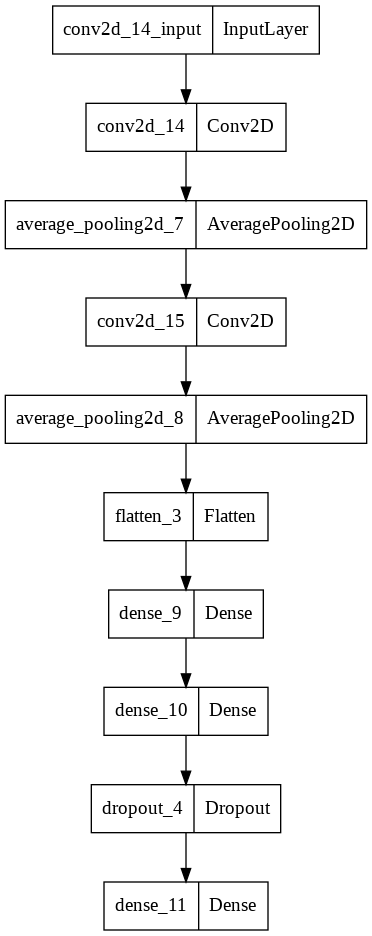

In [26]:
keras.utils.plot_model(model)

In [34]:
# Compiling the CNN model
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

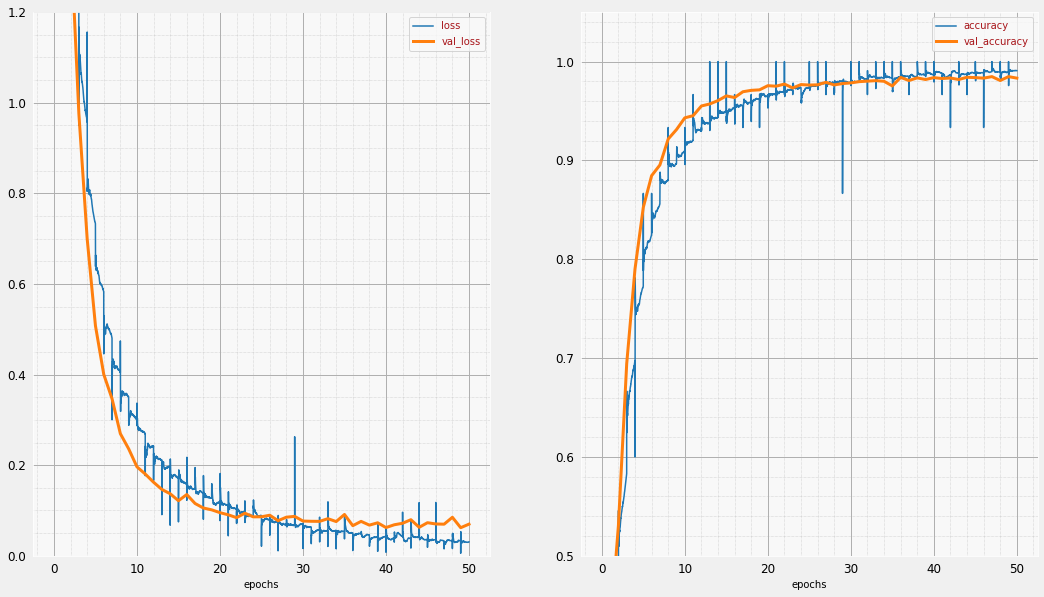

1045/1045 [==============================] - 5s 5ms/step - loss: 0.0307 - accuracy: 0.9908 - val_loss: 0.0699 - val_accuracy: 0.9833
CPU times: user 5min 2s, sys: 27 s, total: 5min 29s
Wall time: 5min 22s


In [35]:
## Fitting the model, with early stopping callback
%%time
#earlystop_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights =True)
BATCH_SIZE = BATCH_SIZE
steps_per_epoch = 31367//BATCH_SIZE  # len(xtrain)
print("Steps per epoch: ", steps_per_epoch)
print("the batch size is ", BATCH_SIZE )
model_history = model.fit(xtrain,ytrain, epochs=50,
                          batch_size  = BATCH_SIZE,
                         steps_per_epoch = steps_per_epoch,
                         validation_data=(xvalid,yvalid),
                        # callbacks=[earlystop_cb],
                          callbacks=[plot_training])

In [22]:
# model save 
model.save('model_LeNet')

INFO:tensorflow:Assets written to: model_LeNet/assets


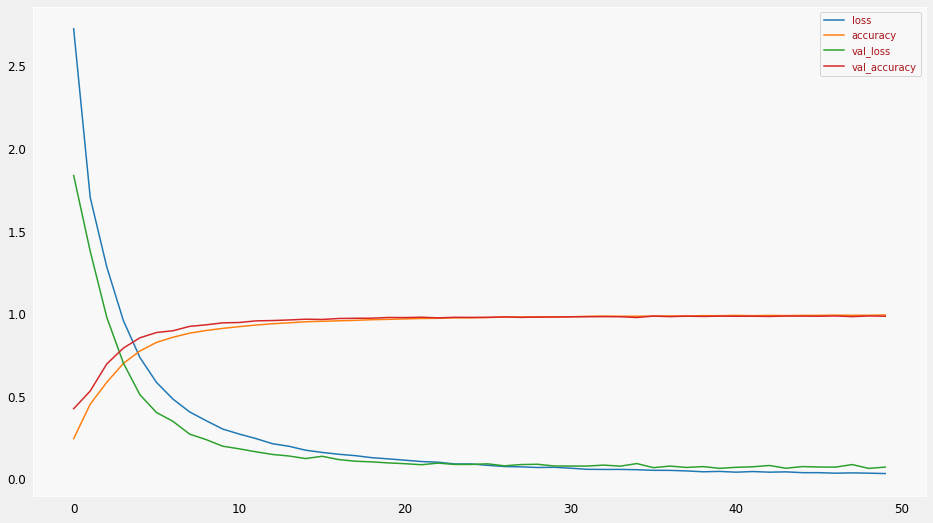

In [36]:
pd.DataFrame(model_history.history).plot()
plt.show()

> Il me semble avoir un tres bon modele allons voir avec les données test

# Evaluating model performance and making predictions of model 

In [37]:
## Évaluation du modèle

loss, accuracy = model.evaluate(xtest,ytest)
print(f'Loss = {loss:.2f}\naccuracy = {accuracy*100:.2f}%')

395/395 [==============================] - 1s 3ms/step - loss: 0.6116 - accuracy: 0.9132
Loss = 0.61
accuracy = 91.32%


> **On a une accuracy de 91.32%. Ce qui n'est pas mal comme modele donc nous gardons le modele**

In [38]:
## Making predictions

prob = model.predict(xtest)
pred = np.argmax(prob, axis=-1)


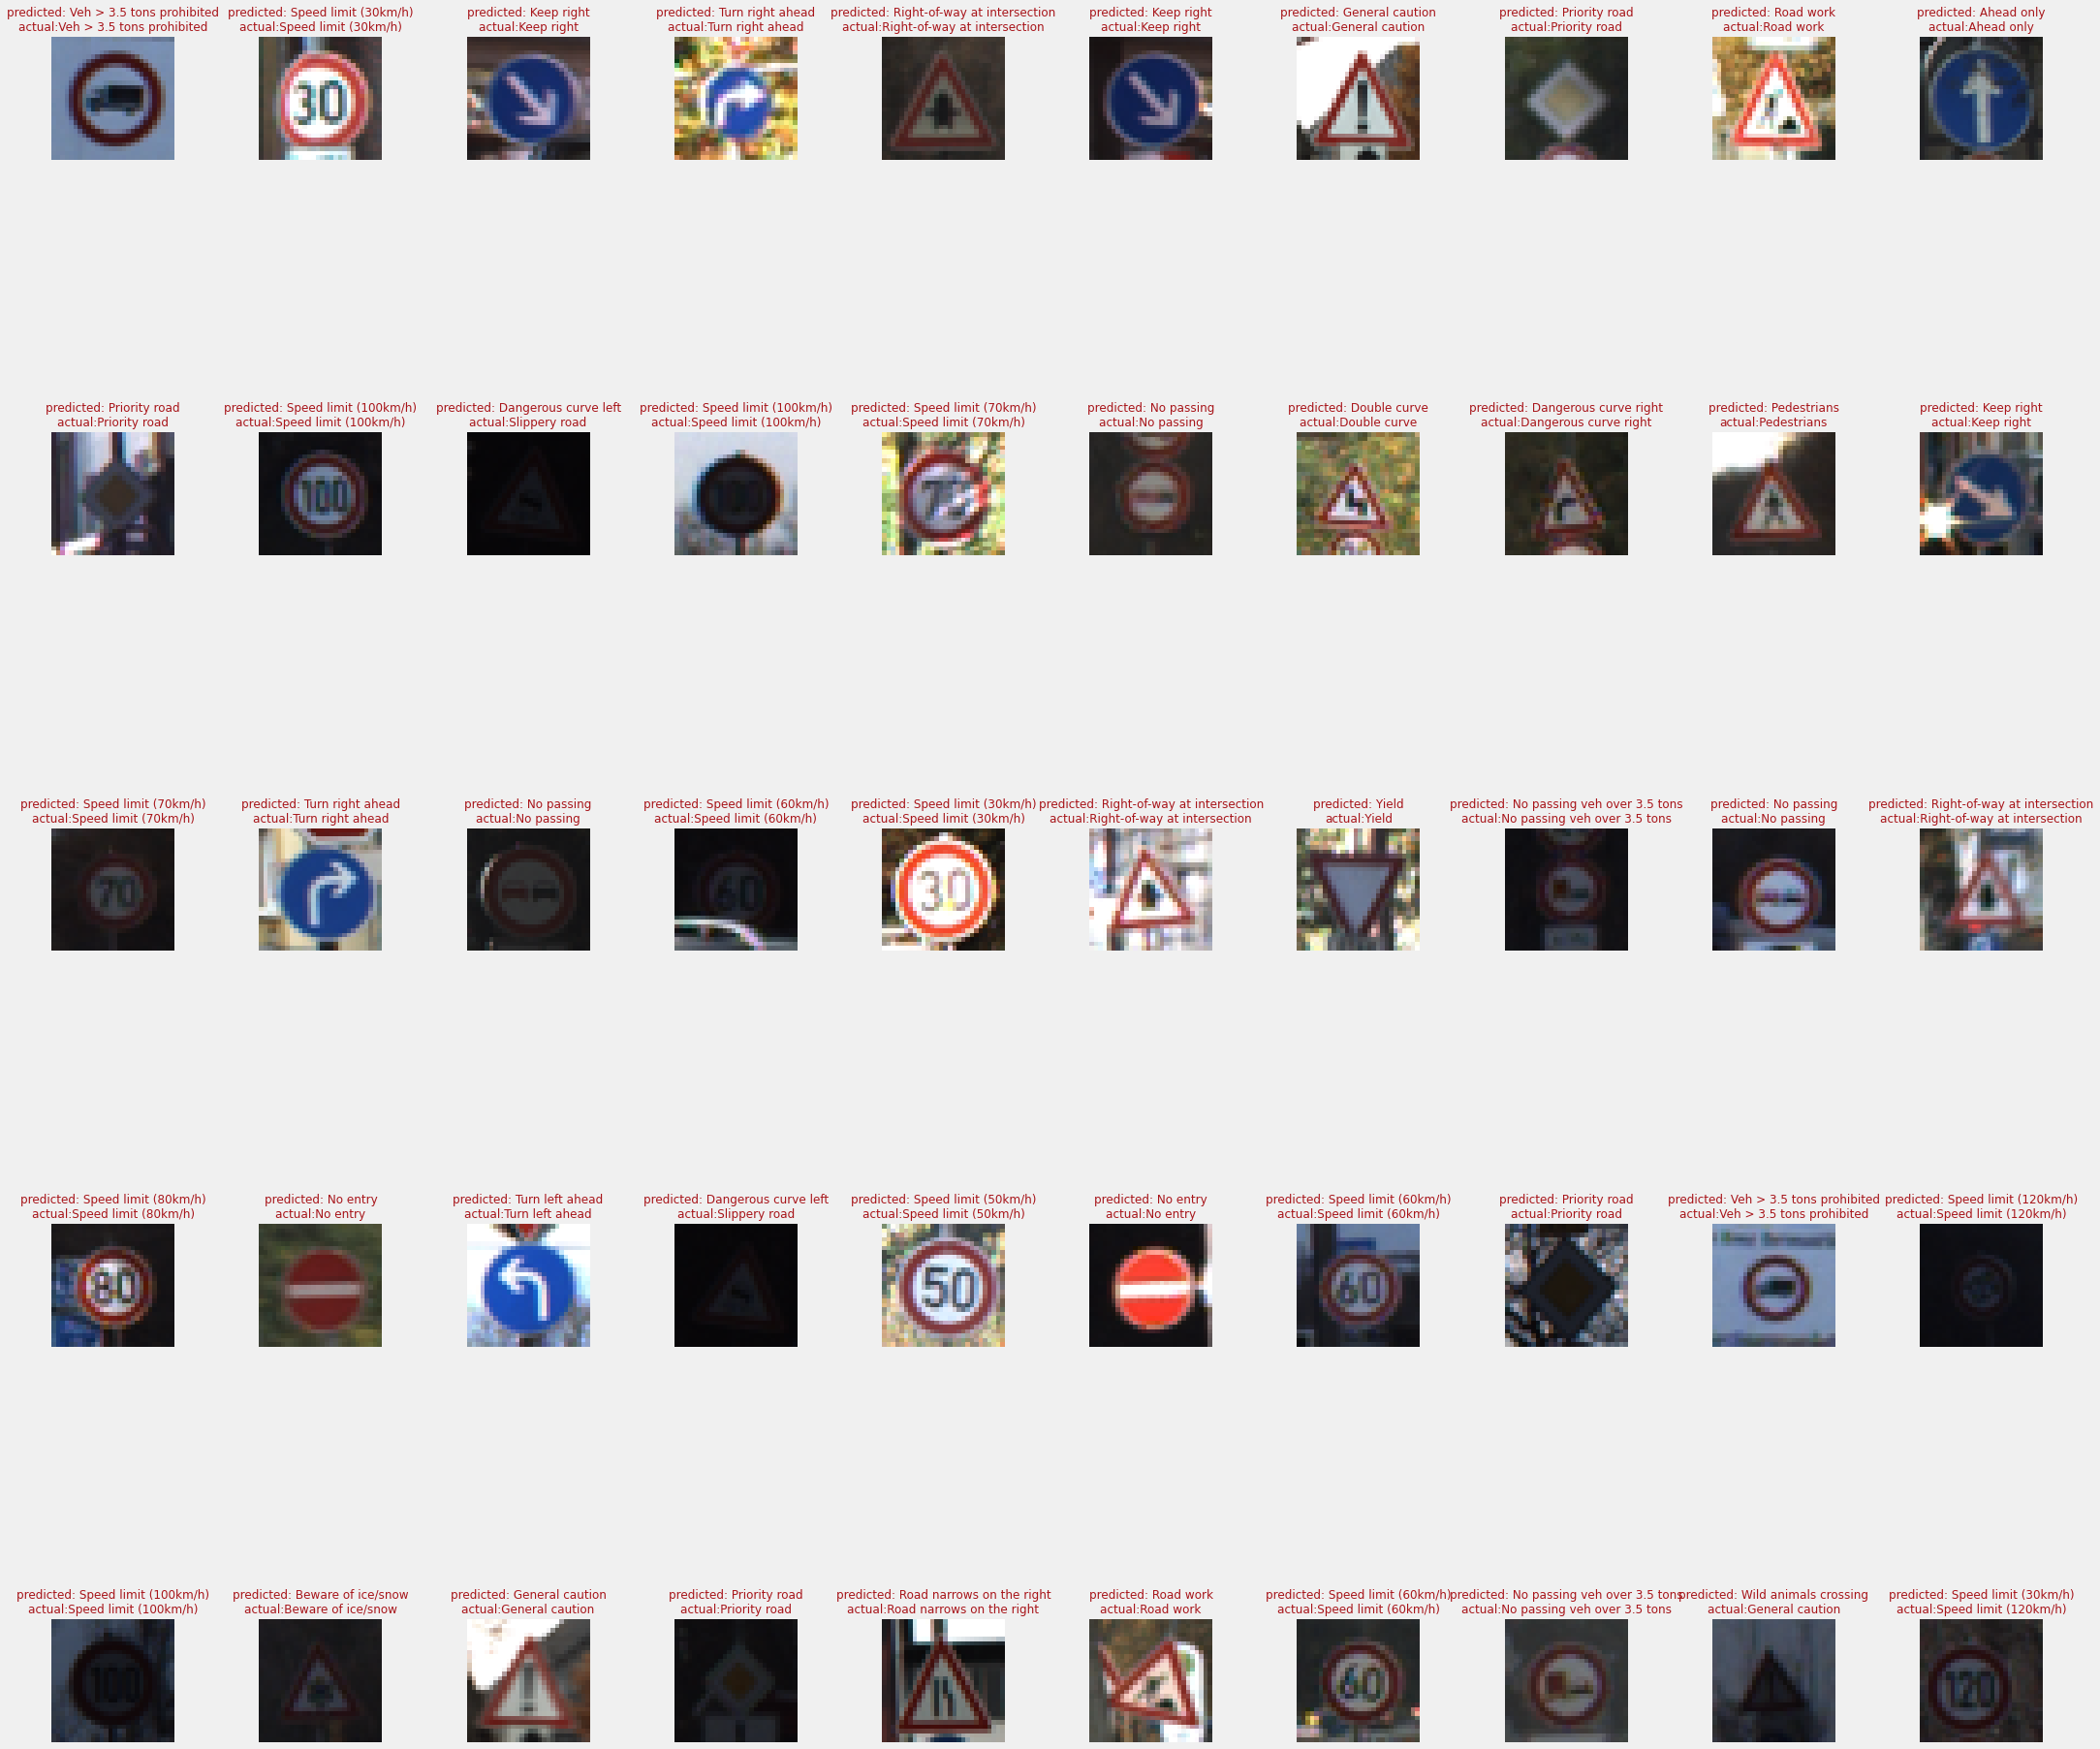

In [39]:
# print(prob[1])
plt.figure(figsize=(30,30))
for i in range(50):
    ax = plt.subplot(5,10,i+1)
    ax.imshow(xtest[i])
    ax.set_title(f'predicted: {classes[pred[i]]}\nactual:{classes[test_y[i]]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

***

***
 **EXERCICE EN MINI PROJET**

> En utilisant le même jeu de données sur Google colab


> Vous allez implémenter les deux types d'acritecture historique en Deep Learning 




***

***


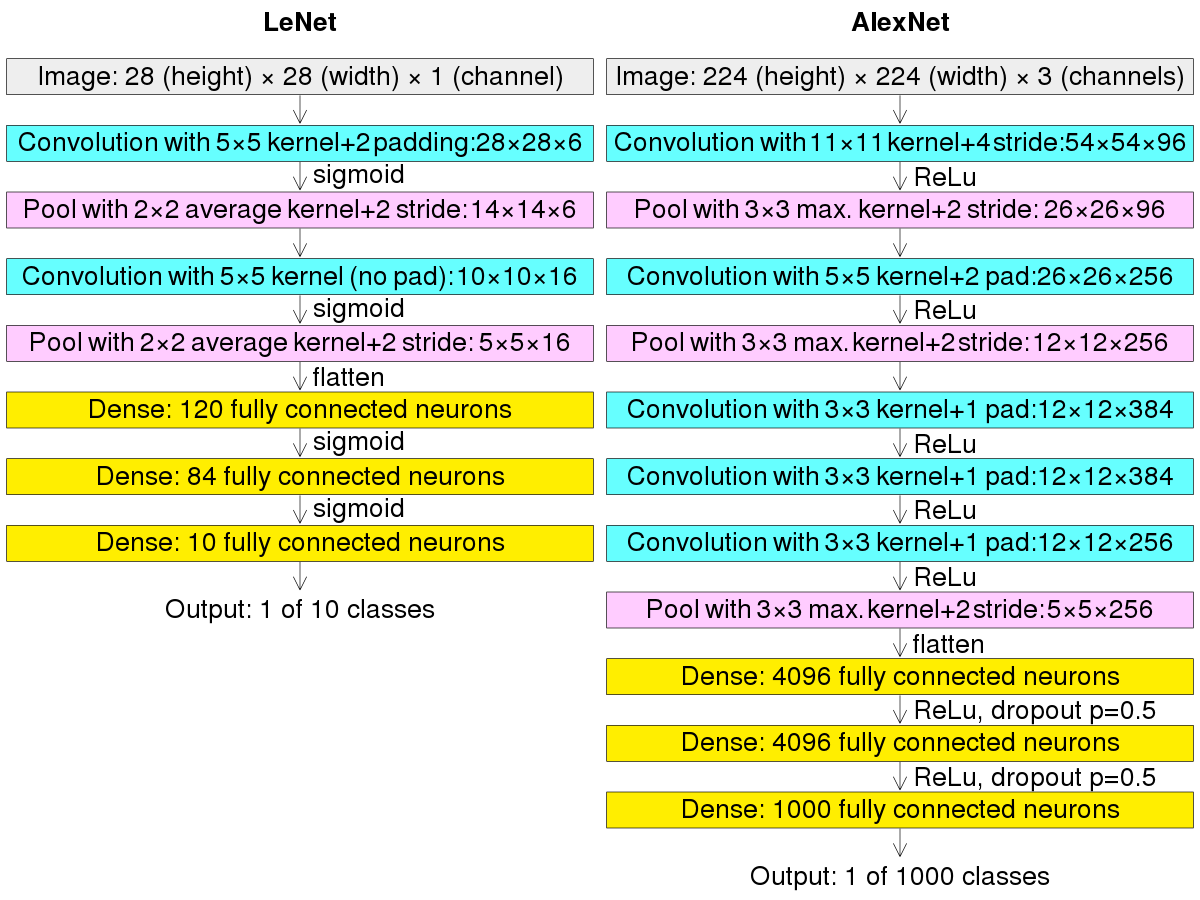
